# CORDOBA

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("properatti.csv")

In [3]:
df.head(50)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [5]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


# Vamos a borrar outliers: pisos mayores a 45 y operaciones en 'UYU' o 'PEN', asumimos que son ruido y los borramos

In [6]:
df.loc[df['floor']>=45,'floor'] = None
df.loc[df['rooms']>=10,'rooms'] = None
df['price_usd_per_m2'].apply(lambda x :np.nan if x == np.inf else x)

df.loc[df['currency']=='UYU','currency'] = None
df.loc[df['currency']=='PEN','currency'] = None

# Vamos a convertir el texto de las columnas 'title' y 'description' a minúsculas y pasar a dos decimales todo

In [7]:
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()
pd.options.display.float_format = '{:.2f}'.format

# Vamos a completar la información faltante en base a un diccionario


# Creo el diccionario del parser
Cada nueva fila debe tener formato: ['regEx para buscar', 'regEx para extraer números contenidos dentro del resultado de la regEx de búsqueda', 'columna donde buscar', 'columna donde guardar el dato faltante', 'tipo del dato a extraer']

In [8]:
col_names =  ['lookup_regex', 'extract_regex', 'column_to_lookup','column_to_complete','value_type','value_offset','extra_condition']
diccionario  = pd.DataFrame(columns = col_names)
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'title' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'description' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
#diccionario.loc[len(diccionario)] = ['/d abc', '/d', 'description', 'metros2', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'description', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'title', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'title', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'description', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'description', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'title', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'title', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'description', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'description', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #CHEQUEAR. HAY UN EJEMPLO QUE CUANDO DICE TERCER ENCUENTRA UNA OBSERVACION QUE LITERALMENTE DICE TERCERA EDAD. QUE HACE EL CODIGO EN ESTE CASO?
diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'title', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'title', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'description', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #mismo caso. Puede llegar a traer una observacion que dice 4 cuartoSS ????
diccionario.loc[len(diccionario)] = ['quianto|QUINTO|Quinto|5to', '', 'title', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['quinto|QUINTO|Quinto|5to', '', 'description', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'description', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'title', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'title', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'description', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'description', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'title', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'title', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'description', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}Hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*', '\d{1,2}', 'title', 'rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*','\d{1,2}','description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*','\d{1,2}', 'description','rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*|\d{1,7} {0,3}dólar*','\d{1,7}','title','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*','\d{1,7}','description','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {0,3}peso*|\d{1,8} {0,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','title', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {1,3}peso*|\d{1,8} {1,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','description', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]



In [9]:
diccionario

,lookup_regex,extract_regex,column_to_lookup,column_to_complete,value_type,value_offset,extra_condition
0,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",title,rooms,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
1,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",description,rooms,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
2,monoamb|Monoamb|MONOAMB,,description,rooms,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
3,monoamb|Monoamb|MONOAMB,,title,rooms,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
4,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",description,floor,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
5,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",title,floor,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
6,primer|PRIMER|Primer|1er,,title,floor,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
7,primer|PRIMER|Primer|1er,,description,floor,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
8,decimo|DECIMO|Decimo|décimo,,description,floor,float,10,"{'data_column': 'country_name', 'value': 'Arge..."
9,decimo|DECIMO|Decimo|décimo,,title,floor,float,10,"{'data_column': 'country_name', 'value': 'Arge..."


Defino la función que procesa el dataframe iterando en base al diccionaro:

In [10]:
def parse(string,pattern):
    matches = re.search(pattern["lookup_regex"], string)
    parse_data = None
    if matches != None:
        if (pattern["value_type"] == 'float') and (pattern["extract_regex"] != ''):
            parse_data = float( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + float(pattern["value_offset"])
        elif (pattern["value_type"] == 'int') and (pattern["extract_regex"] != ''):
            parse_data = int( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + int(pattern["value_offset"])
        elif (pattern["value_type"] == 'string') and (pattern["extract_regex"] != ''):
            parse_data = re.search(pattern["extract_regex"], matches.group(0)).group(0) + pattern["value_offset"]
        elif pattern["value_type"] == 'float':
            parse_data = float(pattern["value_offset"])
        elif pattern["value_type"] == 'int':
            parse_data = int(pattern["value_offset"])
        else:
            parse_data = pattern["value_offset"]
    return parse_data

def df_parser(data,parse_dictionary):
    for pattern_row_index, pattern in parse_dictionary.iterrows():
        rows_to_parse = (data[pattern["column_to_complete"]].isnull() == True) & (pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True) 
        info_to_parse = data[rows_to_parse][pattern["column_to_lookup"]]
        valid_info = info_to_parse[info_to_parse.apply(lambda a : (type(a) is str) and (a != ''))]
        data.loc[rows_to_parse, pattern["column_to_complete"]] = valid_info.apply(parse, args=([pattern]))

### Corro la función para parsear la información

In [11]:
df_parser(df,diccionario)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100806 non-null object
price_aprox_local_currency    100840 non-null float64
price_aprox_usd               100825 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         108686 no

## Finalmente, vamos a calcular los valores u$d/m2 en donde falten:

In [13]:
df.loc[ df['price_usd_per_m2'].isnull() == True,'price_usd_per_m2'] = df.loc[ df['price_usd_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_usd_per_m2'].isnull() == True,'surface_total_in_m2']

In [14]:
df.loc[ df['price_per_m2'].isnull() == True,'price_per_m2'] = df.loc[ df['price_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_per_m2'].isnull() == True,'surface_total_in_m2']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100806 non-null object
price_aprox_local_currency    100840 non-null float64
price_aprox_usd               100825 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         108686 no

## Reagrupo el DF

In [16]:
df = df[["property_type", "place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms"]]
df.head()

,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,62000.00,USD,1093959.00,62000.00,55.00,40.00,1127.27,1550.00,nan,2.00
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,150000.00,USD,2646675.00,150000.00,nan,nan,nan,nan,10.00,2.00
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,72000.00,USD,1270404.00,72000.00,55.00,55.00,1309.09,1309.09,3.00,2.00
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,95000.00,USD,1676227.50,95000.00,nan,nan,nan,nan,nan,3.00
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,64000.00,USD,1129248.00,64000.00,35.00,35.00,1828.57,1828.57,nan,2.00


In [17]:
df["state_name"].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [18]:
# Divido el DF para trabajar con Cordoba
cordoba = df.loc[df["state_name"] == "Córdoba",:]

cordoba.head()

,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
10,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,70000.00,USD,1235115.00,70000.00,1514.00,1514.00,46.24,815.80,nan,3.00
20,house,Villa Giardino,|Argentina|Córdoba|Villa Giardino|,Argentina,Córdoba,nan,NaN,nan,nan,148.00,148.00,nan,nan,4.00,nan
32,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,550000.00,ARS,544262.59,30846.02,50.00,50.00,616.92,11000.00,1.00,3.00
37,house,Malagueño,|Argentina|Córdoba|Malagueño|,Argentina,Córdoba,1250000.00,ARS,1236960.43,70104.59,75.00,75.00,934.73,16666.67,1.00,nan
41,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Argentina,Córdoba,nan,NaN,nan,nan,115.00,115.00,nan,nan,1.00,4.00


In [19]:
cordoba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12069 entries, 10 to 121206
Data columns (total 15 columns):
property_type                 12069 non-null object
place_name                    12069 non-null object
place_with_parent_names       12069 non-null object
country_name                  12069 non-null object
state_name                    12069 non-null object
price                         9038 non-null float64
currency                      9037 non-null object
price_aprox_local_currency    9049 non-null float64
price_aprox_usd               9039 non-null float64
surface_total_in_m2           5044 non-null float64
surface_covered_in_m2         9774 non-null float64
price_usd_per_m2              3690 non-null float64
price_per_m2                  6956 non-null float64
floor                         4159 non-null float64
rooms                         8839 non-null float64
dtypes: float64(9), object(6)
memory usage: 1.5+ MB


In [20]:
cordoba = cordoba[["property_type","place_name","state_name","price","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms"]]
cordoba.head()

,property_type,place_name,state_name,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
10,house,Córdoba,Córdoba,70000.00,1235115.00,70000.00,1514.00,1514.00,46.24,815.80,nan,3.00
20,house,Villa Giardino,Córdoba,nan,nan,nan,148.00,148.00,nan,nan,4.00,nan
32,apartment,Córdoba,Córdoba,550000.00,544262.59,30846.02,50.00,50.00,616.92,11000.00,1.00,3.00
37,house,Malagueño,Córdoba,1250000.00,1236960.43,70104.59,75.00,75.00,934.73,16666.67,1.00,nan
41,apartment,Villa Carlos Paz,Córdoba,nan,nan,nan,115.00,115.00,nan,nan,1.00,4.00


In [21]:
cordoba.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
count,9038.00,9049.00,9039.00,5044.00,9774.00,3690.00,6956.00,4159.00,8839.00
mean,938755.24,3588481.05,203601.72,406.52,192.21,inf,inf,3.37,2.72
std,1111533.99,9417667.67,533997.54,4111.55,645.87,nan,nan,4.39,2.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,170000.00,1236960.43,70104.59,53.00,48.00,841.26,1332.14,1.00,2.00
50%,800000.00,1721848.94,97999.00,79.00,85.00,1225.00,10909.09,2.00,2.00
75%,1450000.00,2968705.29,168251.03,190.00,180.00,1573.85,25361.43,4.00,3.00
max,56500000.00,441112500.00,25000000.00,110000.00,25000.00,inf,inf,91.00,65.00


In [22]:
piso = cordoba.loc[cordoba["floor"] < 40,"floor"]
amb = cordoba.loc[cordoba["rooms"] < np.mean(cordoba["rooms"]) + 3 * np.std(cordoba["rooms"]),"rooms"]
price_usd_m2 = cordoba.loc[cordoba["price_usd_per_m2"] < 14000,"price_usd_per_m2"]
price_usd = cordoba.loc[cordoba["price_aprox_usd"] < 790000,"price_aprox_usd"]
sup_total = cordoba.loc[cordoba["surface_total_in_m2"] < np.mean(cordoba["surface_total_in_m2"]) + 3 * np.std(cordoba["surface_total_in_m2"]),"surface_total_in_m2"]
surface_cov = cordoba.loc[cordoba["surface_covered_in_m2"] < np.mean(cordoba["surface_covered_in_m2"]) + 3 * np.std(cordoba["surface_covered_in_m2"]),"surface_covered_in_m2"]

In [23]:
cordoba["piso"] = piso
cordoba["ambientes"] = amb
cordoba["precio en dolares"] = price_usd
cordoba["superficie total en m2"] = sup_total
cordoba["superficie cubierta en m2"] = surface_cov
cordoba["precio en USD por m2"] = price_usd_m2

cordoba_2 = cordoba[["property_type","place_name","piso","ambientes","precio en dolares","superficie total en m2","superficie cubierta en m2","precio en USD por m2"]]

cordoba_2.head()

,property_type,place_name,piso,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2
10,house,Córdoba,nan,3.00,70000.00,1514.00,1514.00,46.24
20,house,Villa Giardino,4.00,nan,nan,148.00,148.00,nan
32,apartment,Córdoba,1.00,3.00,30846.02,50.00,50.00,616.92
37,house,Malagueño,1.00,nan,70104.59,75.00,75.00,934.73
41,apartment,Villa Carlos Paz,1.00,4.00,nan,115.00,115.00,nan


In [24]:
cordoba_2['precio en USD por m2'].apply(lambda x :np.nan if x == np.inf else x)

cordoba_2.describe()

,piso,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2
count,4153.00,8814.00,8614.00,5033.00,9698.00,3675.00
mean,3.29,2.66,133850.46,239.97,144.39,1202.53
std,3.80,1.66,114646.04,609.58,179.21,631.09
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,68982.92,53.00,48.00,841.25
50%,2.00,2.00,95000.00,79.00,84.00,1222.22
75%,4.00,3.00,150000.00,190.00,176.00,1570.34
max,37.00,9.00,787000.00,11578.00,2100.00,8611.11


In [25]:
cordoba_2["place_name"].value_counts()

Córdoba                      9254
Punilla                       713
Villa Carlos Paz              612
Villa Allende                 211
Santa María                   155
La Calera                     125
Villa General Belgrano        107
Mendiolaza                     81
Río Cuarto                     61
Santa Rosa de Calamuchita      60
Río Ceballos                   39
Unquillo                       34
Los Reartes                    26
Oncativo                       24
Villa del Dique                23
San Francisco                  22
Río Tercero                    20
Alta Gracia                    18
San Antonio de Arredondo       18
Mina Clavero                   17
Jesús María                    17
Tanti                          17
La Granja                      16
Villa Giardino                 16
Malagueño                      15
Cosquín                        14
Villa Rumipal                  14
Colonia Caroya                 14
Villa María                    12
Potrero de Gar

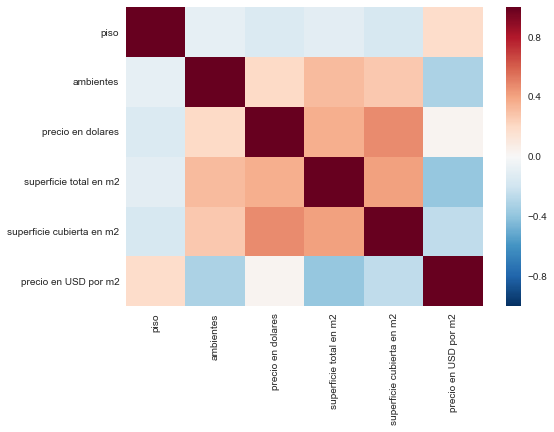

In [26]:
sns.heatmap(cordoba_2.corr())

In [27]:
cordoba_2.corr()

,piso,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2
piso,1.00,-0.09,-0.14,-0.10,-0.17,0.19
ambientes,-0.09,1.00,0.20,0.32,0.27,-0.32
precio en dolares,-0.14,0.20,1.00,0.36,0.47,0.03
superficie total en m2,-0.10,0.32,0.36,1.00,0.41,-0.38
superficie cubierta en m2,-0.17,0.27,0.47,0.41,1.00,-0.26
precio en USD por m2,0.19,-0.32,0.03,-0.38,-0.26,1.00


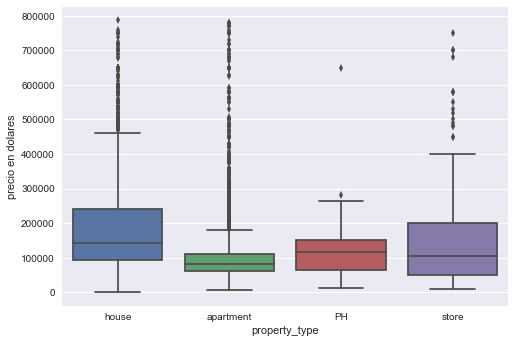

In [28]:
ax = sns.boxplot(x = cordoba_2["property_type"], y = cordoba_2["precio en dolares"], data = cordoba_2)

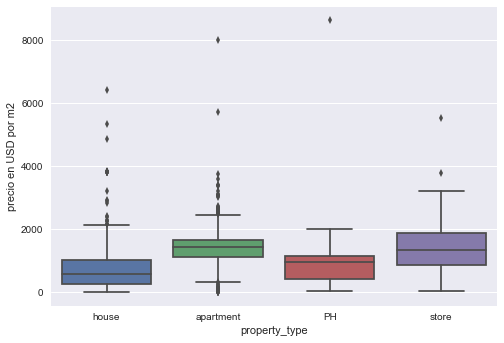

In [29]:
ay = sns.boxplot(x = cordoba_2["property_type"],y = cordoba_2["precio en USD por m2"], data = cordoba_2)

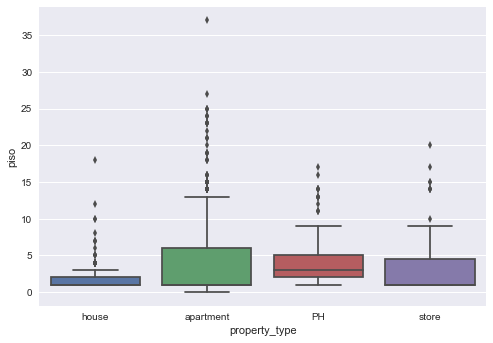

In [30]:
az = sns.boxplot(x = cordoba_2["property_type"], y = cordoba_2["piso"], data = cordoba_2)

In [31]:

cordoba_2["property_type"].value_counts()

apartment    6681
house        4521
store         466
PH            401
Name: property_type, dtype: int64

In [31]:
#Dropeo la columna piso
cordoba_3 = cordoba_2.drop(["piso"],axis = 1)
cordoba_3.head()

,property_type,place_name,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2
10,house,Córdoba,3.00,70000.00,1514.00,1514.00,46.24
20,house,Villa Giardino,nan,nan,148.00,148.00,nan
32,apartment,Córdoba,3.00,30846.02,50.00,50.00,616.92
37,house,Malagueño,nan,70104.59,75.00,75.00,934.73
41,apartment,Villa Carlos Paz,4.00,nan,115.00,115.00,nan


In [32]:
#Saco las filas duplicadas
cordoba_3 = cordoba_3.drop_duplicates()
cordoba_3.describe()

,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2
count,7195.00,7785.00,4515.00,8434.00,3511.00
mean,2.77,136121.55,254.77,148.42,1190.72
std,1.74,116078.79,635.49,185.82,627.60
min,0.00,0.00,0.00,0.00,0.00
25%,2.00,69992.42,53.00,48.00,825.75
50%,2.00,95342.25,81.00,88.00,1205.30
75%,3.00,155000.00,200.00,176.00,1565.19
max,9.00,787000.00,11578.00,2100.00,8611.11


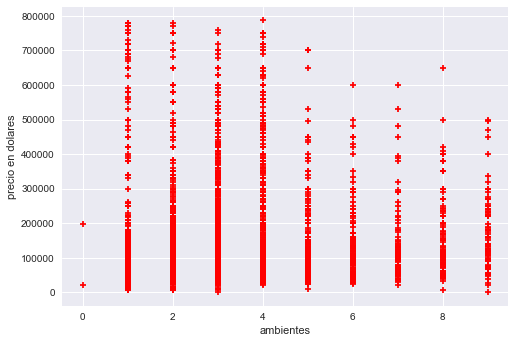

In [33]:
plt.scatter(cordoba_3["ambientes"],cordoba_3["precio en dolares"], s=30, c='r', marker='+', zorder=10)
plt.xlabel("ambientes")
plt.ylabel("precio en dolares")
plt.show()


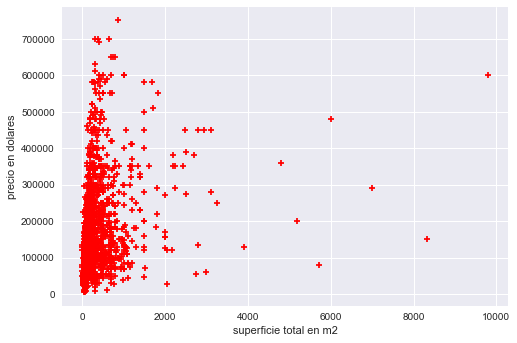

In [34]:
plt.scatter(cordoba_3["superficie total en m2"],cordoba_3["precio en dolares"], s=30, c='r', marker='+', zorder=10)
plt.xlabel("superficie total en m2")
plt.ylabel("precio en dolares")
plt.show()


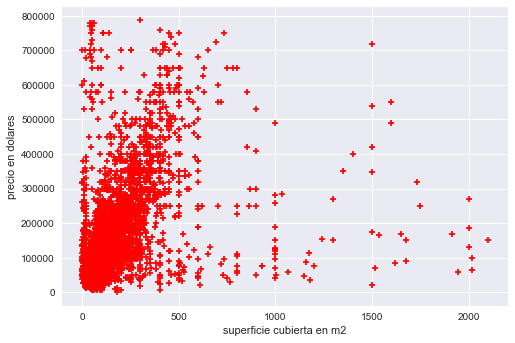

In [35]:
plt.scatter(cordoba_3["superficie cubierta en m2"],cordoba_3["precio en dolares"], s=30, c='r', marker='+', zorder=10)
plt.xlabel("superficie cubierta en m2")
plt.ylabel("precio en dolares")
plt.show()


In [36]:
dummies_PT = pd.get_dummies(cordoba_3["property_type"],drop_first = True)
dummies_PT.head()

,apartment,house,store
10,0,1,0
20,0,1,0
32,1,0,0
37,0,1,0
41,1,0,0


In [37]:
cordoba_3 = pd.concat([cordoba_3,dummies_PT],axis = 1)
cordoba_3.head()

,property_type,place_name,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2,apartment,house,store
10,house,Córdoba,3.00,70000.00,1514.00,1514.00,46.24,0,1,0
20,house,Villa Giardino,nan,nan,148.00,148.00,nan,0,1,0
32,apartment,Córdoba,3.00,30846.02,50.00,50.00,616.92,1,0,0
37,house,Malagueño,nan,70104.59,75.00,75.00,934.73,0,1,0
41,apartment,Villa Carlos Paz,4.00,nan,115.00,115.00,nan,1,0,0


In [39]:
cordoba_3

,property_type,place_name,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2,apartment,house,store
10,house,Córdoba,3.00,70000.00,1514.00,1514.00,46.24,0,1,0
20,house,Villa Giardino,nan,nan,148.00,148.00,nan,0,1,0
32,apartment,Córdoba,3.00,30846.02,50.00,50.00,616.92,1,0,0
37,house,Malagueño,nan,70104.59,75.00,75.00,934.73,0,1,0
41,apartment,Villa Carlos Paz,4.00,nan,115.00,115.00,nan,1,0,0
87,house,Córdoba,2.00,nan,nan,170.00,nan,0,1,0
88,apartment,Córdoba,1.00,nan,nan,nan,nan,1,0,0
89,apartment,Córdoba,1.00,50000.00,nan,53.00,nan,1,0,0
90,apartment,Córdoba,3.00,nan,nan,nan,nan,1,0,0
91,house,Córdoba,3.00,260000.00,nan,nan,nan,0,1,0


In [38]:
cordoba_3.corr()

,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2,apartment,house,store
ambientes,1.00,0.19,0.31,0.25,-0.32,-0.41,0.43,-0.04
precio en dolares,0.19,1.00,0.36,0.47,0.04,-0.33,0.33,0.03
superficie total en m2,0.31,0.36,1.00,0.40,-0.39,-0.32,0.32,0.10
superficie cubierta en m2,0.25,0.47,0.40,1.00,-0.27,-0.38,0.37,0.08
precio en USD por m2,-0.32,0.04,-0.39,-0.27,1.00,0.50,-0.54,0.07
apartment,-0.41,-0.33,-0.32,-0.38,0.50,1.00,-0.86,-0.22
house,0.43,0.33,0.32,0.37,-0.54,-0.86,1.00,-0.18
store,-0.04,0.03,0.10,0.08,0.07,-0.22,-0.18,1.00


In [39]:
cordoba_4 = cordoba_3.dropna()
cordoba_4.describe()

,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2,apartment,house,store
count,2390.00,2390.00,2390.00,2390.00,2390.00,2390.00,2390.00,2390.00
mean,2.32,124301.88,204.06,107.61,1153.54,0.66,0.32,0.01
std,1.36,91626.36,415.53,124.27,573.11,0.47,0.46,0.08
min,0.00,6348.67,22.00,0.00,20.00,0.00,0.00,0.00
25%,1.00,70890.60,52.00,45.00,774.83,0.00,0.00,0.00
50%,2.00,92130.58,77.00,65.00,1183.71,1.00,0.00,0.00
75%,3.00,145000.00,187.00,128.75,1539.83,1.00,1.00,0.00
max,9.00,690000.00,9800.00,1748.00,3833.33,1.00,1.00,1.00


In [40]:
cordoba_4.corr()

,ambientes,precio en dolares,superficie total en m2,superficie cubierta en m2,precio en USD por m2,apartment,house,store
ambientes,1.00,0.40,0.33,0.40,-0.39,-0.50,0.50,-0.02
precio en dolares,0.40,1.00,0.43,0.60,-0.03,-0.40,0.42,0.05
superficie total en m2,0.33,0.43,1.00,0.38,-0.47,-0.42,0.44,-0.01
superficie cubierta en m2,0.40,0.60,0.38,1.00,-0.30,-0.49,0.50,0.03
precio en USD por m2,-0.39,-0.03,-0.47,-0.30,1.00,0.63,-0.63,0.03
apartment,-0.50,-0.40,-0.42,-0.49,0.63,1.00,-0.95,-0.11
house,0.50,0.42,0.44,0.50,-0.63,-0.95,1.00,-0.05
store,-0.02,0.05,-0.01,0.03,0.03,-0.11,-0.05,1.00


In [41]:
feature_cols = ["apartment", "house", "store"]
X = cordoba_4[feature_cols]
y = cordoba_4["precio en dolares"]

In [42]:
#Pruebo un modelo de regresion lineal

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm = linear_model.LinearRegression()
model_1 = lm.fit(X_train, y_train)



In [43]:
print (model_1.intercept_)
print (model_1.coef_)
print (model_1.score(X,y))

84133.4963158
[ 13667.6762211   95430.22033613  99893.66535088]
0.177432500609


In [44]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm2 = PolynomialRegression()
model_2 = lm2.fit(X_train, y_train)


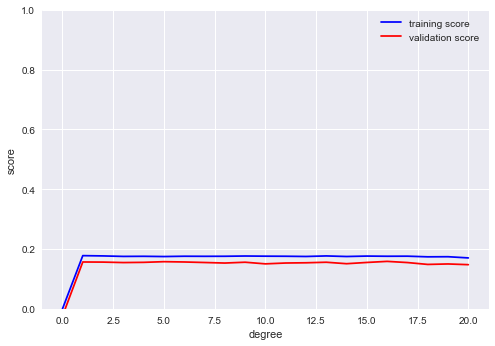

In [48]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree'
                                          , degree, cv=7)

plt.plot(degree, np.mean(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show();

In [46]:
# Vamos a agregar mas variables al modelo

feature_cols = ["apartment", "house", "store", "ambientes", "superficie cubierta en m2"]
X = cordoba_4[feature_cols]
y = cordoba_4["precio en dolares"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm = linear_model.LinearRegression()
model_3 = lm.fit(X_train, y_train)
print (model_3.intercept_)
print (model_3.coef_)
print (model_3.score(X,y))

29394.0164415
[ 27141.16181363  47440.26126785  77425.05569342  10625.65973726
    339.64655573]
0.401542954704


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
lm3 = PolynomialRegression(3)
model_4 = lm2.fit(X_train, y_train)
print(model_4.score(X_train,y_train))
print(model_4.score(X_test,y_test))


0.579618313069
0.679870694958


### RIDGE

In [73]:
from sklearn.linear_model import Ridge

#pruebo dos alphas distintos para ver como ajustan al modelo
rr = Ridge(alpha = 0.01, normalize = True)
rr.fit(X_train,y_train)

rr100 = Ridge(alpha = 1, normalize = True)
rr100.fit(X_train,y_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [74]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test,y_test)
Ridge100_train_score = rr100.score(X_train,y_train)
Ridge100_test_score = rr100.score(X_test,y_test)

print(Ridge_train_score)
print(Ridge_test_score)
print(Ridge100_train_score)
print(Ridge100_test_score)

0.391186068469
0.477149124341
0.33083755259
0.336239592733


### LASSO

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [77]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.391332121772
test score:  0.480258871959
number of features used:  5


In [78]:

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.01: 0.391332206968
test score for alpha =0.01:  0.480265165765
number of features used: for alpha =0.01: 5
training score for alpha=0.0001: 0.391332206977
test score for alpha =0.0001:  0.480265227824
number of features used: for alpha =0.0001: 5
